## 338. 比特位计数

给定一个非负整数 num。对于 0 ≤ i ≤ num 范围中的每个数字 i ，计算其二进制数中的 1 的数目并将它们作为数组返回。

示例 1:
```
输入: 2
输出: [0,1,1]
```
示例 2:
```
输入: 5
输出: [0,1,1,2,1,2]
```
进阶:

- 给出时间复杂度为$O(n*sizeof(integer))$的解答非常容易。但你可以在线性时间$O(n)$内用一趟扫描做到吗？
- 要求算法的空间复杂度为$O(n)$。
-


In [ ]:
from typing import List
class Solution:
    def countBits(self, num: int) -> List[int]:
        res = []
        for i in range(num+1):
            tmp = 0
            for j in bin(i)[2:]:
                if int(j) == 1:
                    tmp += 1
            res.append(tmp)
        return res

### `方法一：遍历 与 统计

In [ ]:
from typing import List
class Solution:
    def countBits(self, num: int) -> List[int]:
        res = []
        for i in range(num + 1):
            res.append(bin(i).count("1"))
        return res

- 时间复杂度： $O(N * sizeof(int))$
- 空间复杂度：$O(1)$，返回数组不计入空间复杂度中。

### 方法二：递归
把第 $i$ 个数分成两种情况：

- 如果 $i$ 是偶数，那么它的二进制 1 的位数与 $i / 2$ 的二进制 1 的位数相等；因为偶数的二进制末尾是 0，右移一位等于 $i / 2$，而二进制中 1 的个数没有变化。

- 如果 $i$ 是奇数，那么它的二进制 1 的位数 = $i - 1$ 的二进制位数 $+ 1$；因为奇数的二进制末尾是 1，如果把末尾的 1 去掉就等于 $i - 1$。又 $i - 1$ 是偶数，所以奇数 $i$ 的二进制 1 的个数等于 $i/2$ 中二进制 1 的位数 +1.



In [ ]:
from typing import List
class Solution:
    def countBits(self, num: int) -> List[int]:
        res = []
        for i in range(num+1):
            res.append(self.count(i))
        return res
    
    def count(self, num):
        if num == 0:
            return 0
        if num%2 == 1:
            return self.count(num-1) + 1
        return self.count(num//2)
    

- 时间复杂度： $O(N ^ 2)$，因为遍历了一次，每次求解最多需要递归 $N / 2$次。
- 空间复杂度：$O(N)$，递归需要调用系统栈，栈的大小最多为 $N / 2$。

### 方法三：记忆化搜索
在上面递归解法中，其实有很多重复的计算，比如当 $i = 8$ 的时候，需要求 $i = 4, 2, 1, 0$ 的情况，而这些取值已经计算过了，此时可以使用记忆化搜索。

在每次递归函数结束的时候，把计算结果保存起来。

比如 $i = 8$，需要求 $i = 4$ 的情况，而 $i = 4$的情况在之前已计算过，直接返回 $memo[4]$ 即可。

In [ ]:
from typing import List
class Solution:
    def countBits(self, num: int) -> List[int]:
        self.memo = [0] * (num+1)
        res = []
        for i in range(num+1):
            res.append(self.count(i))
        return res
    
    def count(self, num):
        if num == 0:
            return 0
        if self.memo[num] != 0:
            return self.memo[num] 
        if num%2 == 1:
            res = self.count(num-1) + 1
        else:
            res = self.count(num//2)
        self.memo[num] = res
        return res

- 时间复杂度： $O(N)$，因为遍历了一次，每次求解都可以从之前的记忆化结果中找到。
- 空间复杂度：$O(N)$，用到了辅助的空间保存结果，空间的结果是 $O(N)$。


### 方法四：动态规划
很多时候，动态规划都是从记忆化搜索中优化出来的。

在记忆化搜索过程中，我们看到其实每次调用递归函数的时候，递归函数只会运行一次，就被 memo 捕获并返回了。那么其实可以去除递归函数，直接从 res 数组中查结果。

同时，优化了一下转移方程的表达式为 $answer[i] = answer[i >> 1] + (i & 1) 。


In [ ]:
class Solution:
    def countBits(self, num):
        res = [0] * (num + 1)
        for i in range(1, num + 1):
            res[i] = res[i >> 1] + (i & 1)
        return res


In [ ]:
ss = Solution()
num = 5
o = ss.countBits(num)
print(o)

## 263. 丑数
给你一个整数 n ，请你判断 n 是否为 丑数 。如果是，返回 true ；否则，返回 false 。

丑数 就是只包含质因数 2、3 和/或 5 的正整数。


示例 1：
```
输入：n = 6
输出：true
解释：6 = 2 × 3
```
示例 2：
```
输入：n = 8
输出：true
解释：8 = 2 × 2 × 2
```
示例 3：
```
输入：n = 14
输出：false
解释：14 不是丑数，因为它包含了另外一个质因数 7 。
```
示例 4：
```
输入：n = 1
输出：true
解释：1 通常被视为丑数。
```

In [ ]:
class Solution:
    def isUgly(self, n: int) -> bool:
        if n == 0:
            return False
        if n == 1:
            return True
        if n % 2 == 0:
            return self.isUgly(n/2)
        if n % 3 == 0:
            return self.isUgly(n/3)
        if n % 5 == 0:
            return self.isUgly(n/5)
        return False

In [1]:
ss = Solution()
n =14
res = ss.isUgly(n)
print(res)

NameError: name 'Solution' is not defined

## 264. 丑数 II
给你一个整数 n ，请你找出并返回第 n 个 丑数 。

丑数 就是只包含质因数 2、3 和/或 5 的正整数。

示例 1：
```
输入：n = 10
输出：12
解释：[1, 2, 3, 4, 5, 6, 8, 9, 10, 12] 是由前 10 个丑数组成的序列。
```
示例 2：
```
输入：n = 1
输出：1
解释：1 通常被视为丑数。
 ```

提示：
```
1 <= n <= 1690
```

### 方法一：最小堆
要得到从小到大的第 nn 个丑数，可以使用最小堆实现。

初始时堆为空。首先将最小的丑数 11 加入堆。

每次取出堆顶元素 x，则 x 是堆中最小的丑数，由于 $2x, 3x, 5x$ 也是丑数，因此将 $2x, 3x, 5x$ 加入堆。

上述做法会导致堆中出现重复元素的情况。为了避免重复元素，可以使用哈希集合去重，避免相同元素多次加入堆。

在排除重复元素的情况下，第 $n$ 次从最小堆中取出的元素即为第 $n$ 个丑数。


**复杂度分析**

时间复杂度：$O(n \log n)$. 得到第 $n$ 个丑数需要进行 $n$ 次循环，每次循环都要从最小堆中取出 $1$ 个元素以及向最小堆中加入最多 $3$ 个元素，因此每次循环的时间复杂度是 $O(\log n+\log 3n)=O(\log n)$, 总时间复杂度是 $O(n \log n)$.

空间复杂度：$O(n)$。空间复杂度主要取决于最小堆和哈希集合的大小，最小堆和哈希集合的大小都不会超过 $3n$。


In [2]:
import heapq
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        factors = [2,3,5]
        seen = {1}
        heap = [1]
        
        for i in range(n-1):
            n = heapq.heappop(heap)
            for j in factors:
                if (num := j*n) not in seen:
                    seen.add(num)
                    heapq.heappush(heap,num)
        return heapq.heappop(heap)

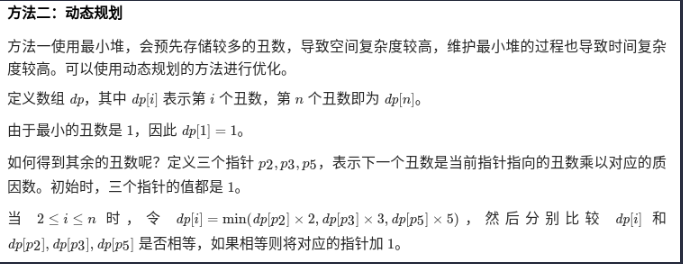

In [ ]:
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        dp = [0] * (n+1)
        p2, p3, p5 = 1,1,1
        dp[1] = 1
        for i in range(2,n+1):
            num2, num3, num5 = dp[p2]*2, dp[p3]*3, dp[p5]*5
            nxt = min(num2, num3, num5)
            if nxt == num2:
                p2 += 1
            if nxt == num3:
                p3 += 1
            if nxt == num5:
                p5 += 1
            dp[i] = nxt
        return dp[n]

In [ ]:
ss = Solution()
nums = 359
res = ss.nthUglyNumber(nums)
print(res)

## 179. Maximum Number

给定一组非负整数 nums，重新排列每个数的顺序（每个数不可拆分）使之组成一个最大的整数。

注意：输出结果可能非常大，所以你需要返回一个字符串而不是整数。

示例 1：
```
输入：nums = [10,2]
输出："210"
```
示例 2：
```
输入：nums = [3,30,34,5,9]
输出："9534330"
```
示例 3：
```
输入：nums = [1]
输出："1"
```
示例 4：
```
输入：nums = [10]
输出："10"
```

提示：
```
1 <= nums.length <= 100
0 <= nums[i] <= 109
```

In [ ]:
from typing import List
import functools

class Solution:
     #先把nums中的所有数字转化为字符串，形成字符串数组 nums_str
    #比较两个字符串x,y的拼接结果x+y和y+x哪个更大，从而确定x和y谁排在前面；将nums_str降序排序
    #把整个数组排序的结果拼接成一个字符串，并且返回
    def largestNumber(self, nums: List[int]) -> str:
        nums_str=list(map(str,nums))
        compare=lambda x,y: 1 if x+y<y+x else -1
        nums_str.sort(key=functools.cmp_to_key(compare))
        res=''.join(nums_str)
        if res[0]=='0':
            res='0'
        return res

In [ ]:
ss = Solution()
nums = [111311, 1113]
res = ss.largestNumber(nums)
print(res)

## 354. 俄罗斯套娃信封问题

给你一个二维整数数组 envelopes ，其中 envelopes[i] = [wi, hi] ，表示第 i 个信封的宽度和高度。

当另一个信封的宽度和高度都比这个信封大的时候，这个信封就可以放进另一个信封里，如同俄罗斯套娃一样。

请计算 最多能有多少个 信封能组成一组“俄罗斯套娃”信封（即可以把一个信封放到另一个信封里面）。

注意：不允许旋转信封。

 
示例 1：
```
输入：envelopes = [[5,4],[6,4],[6,7],[2,3]]
输出：3
解释：最多信封的个数为 3, 组合为: [2,3] => [5,4] => [6,7]。
示例 2：

输入：envelopes = [[1,1],[1,1],[1,1]]
输出：1
 

提示：

- 1 <= envelopes.length <= 5000
- envelopes[i].length == 2
- 1 <= wi, hi <= 104
